In [1]:
# Librerias a utilizar
import pandas as pd
import numpy as np
from ClaseAbdon import DataFrameAnalyzer

In [2]:
tienda =  pd.read_csv('merch_sales.csv')

In [3]:
tienda.shape

(7394, 15)

In [4]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                7394 non-null   int64 
 1   Order Date              7394 non-null   object
 2   Product ID              7394 non-null   object
 3   Product Category        7394 non-null   object
 4   Buyer Gender            7394 non-null   object
 5   Buyer Age               7394 non-null   int64 
 6   Order Location          7394 non-null   object
 7   International Shipping  7394 non-null   object
 8   Sales Price             7394 non-null   int64 
 9   Shipping Charges        7394 non-null   int64 
 10  Sales per Unit          7394 non-null   int64 
 11  Quantity                7394 non-null   int64 
 12  Total Sales             7394 non-null   int64 
 13  Rating                  7394 non-null   int64 
 14  Review                  7394 non-null   object
dtypes: i

In [5]:
# Reemplazamos los espacios en los nombres de las columnas por "_".
list1 = []
list2 = []
for col in tienda.columns:
    list1.append(col.replace(' ','_'))
    list2.append(col)
a = dict(zip(list2,list1))
tienda.rename(columns=a,inplace=True)

In [6]:
# Cambiamos la columna Order Date a DateTime
tienda['Order_Date'] = pd.to_datetime(tienda['Order_Date'])

In [7]:
# Guardamos el archivo ya procesado
tienda.to_csv('Merch_processed.csv')

In [8]:
# Importamos clase para comenzar con el analisis
analizar = DataFrameAnalyzer(tienda)

In [9]:
# Resumen de cardinalidad, valores missing y categorias
analizar.resumen()

,Columna,Tipo de Dato,Cardinalidad,% Cardinalidad,Valores Faltantes,% Valores Faltantes,Categoría
0,Order_ID,int64,7394,100.00,0,0.0,Índice Numérico
1,Order_Date,datetime64[ns],366,4.95,0,0.0,Otro
2,Product_ID,object,13,0.18,0,0.0,Índice Numérico
3,Product_Category,object,3,0.04,0,0.0,Categórica Nominal
4,Buyer_Gender,object,2,0.03,0,0.0,Binaria
5,Buyer_Age,int64,18,0.24,0,0.0,Numérica Discreta
6,Order_Location,object,25,0.34,0,0.0,Categórica Nominal
7,International_Shipping,object,2,0.03,0,0.0,Binaria
8,Sales_Price,int64,13,0.18,0,0.0,Numérica Discreta
9,Shipping_Charges,int64,6,0.08,0,0.0,Numérica Discreta


In [10]:
# Analisis descriptivo por categoria
analizar.describe_categorical()

,unique_values,most_frequent,frequency,proportion
Product_ID,13,BF1548,1497,20.25
Product_Category,3,Clothing,3704,50.09
Buyer_Gender,2,Male,5188,70.16
Order_Location,25,New Jersey,434,5.87
International_Shipping,2,No,5139,69.50
Review,29,Lack of delivery delays is greatly appreciated.,466,6.30


In [11]:
# Analisis descriotivo numerico 
analizar.describe_numeric()

,count,mean,median,mode,std_dev,min,25%,50%,75%,max,skewness,kurtosis
Order_ID,7394.0,159735.134028,159577.5,120005.0,23040.247194,120005.0,139895.75,159577.5,179869.75,199994.0,0.011485,-1.185821
Buyer_Age,7394.0,26.455504,26.0,34.0,5.208202,18.0,22.00,26.0,31.00,35.0,0.010084,-1.214206
Sales_Price,7394.0,55.165404,65.0,65.0,39.575614,9.0,15.00,65.0,97.00,130.0,0.338032,-1.250453
Shipping_Charges,7394.0,14.633487,0.0,0.0,24.815719,0.0,0.00,0.0,40.00,100.0,1.652604,2.051472
Sales_per_Unit,7394.0,69.798891,65.0,65.0,46.702326,9.0,20.00,65.0,100.00,230.0,0.449140,-0.516342
Quantity,7394.0,1.668109,1.0,1.0,1.081398,1.0,1.00,1.0,2.00,5.0,1.577708,1.487874
Total_Sales,7394.0,115.832026,90.0,65.0,118.067960,9.0,40.00,90.0,137.00,1000.0,2.258077,6.602692
Rating,7394.0,3.499053,4.0,4.0,1.389731,1.0,3.00,4.0,5.00,5.0,-0.603098,-0.911546


c:\Users\Abdon.RAMIREZ-BRICEN\OneDrive - Akkodis\Documents\EDA\analisis tienda\ClaseAbdon.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=categorical_df[col], order=categorical_df[col].value_counts().index, palette="viridis")


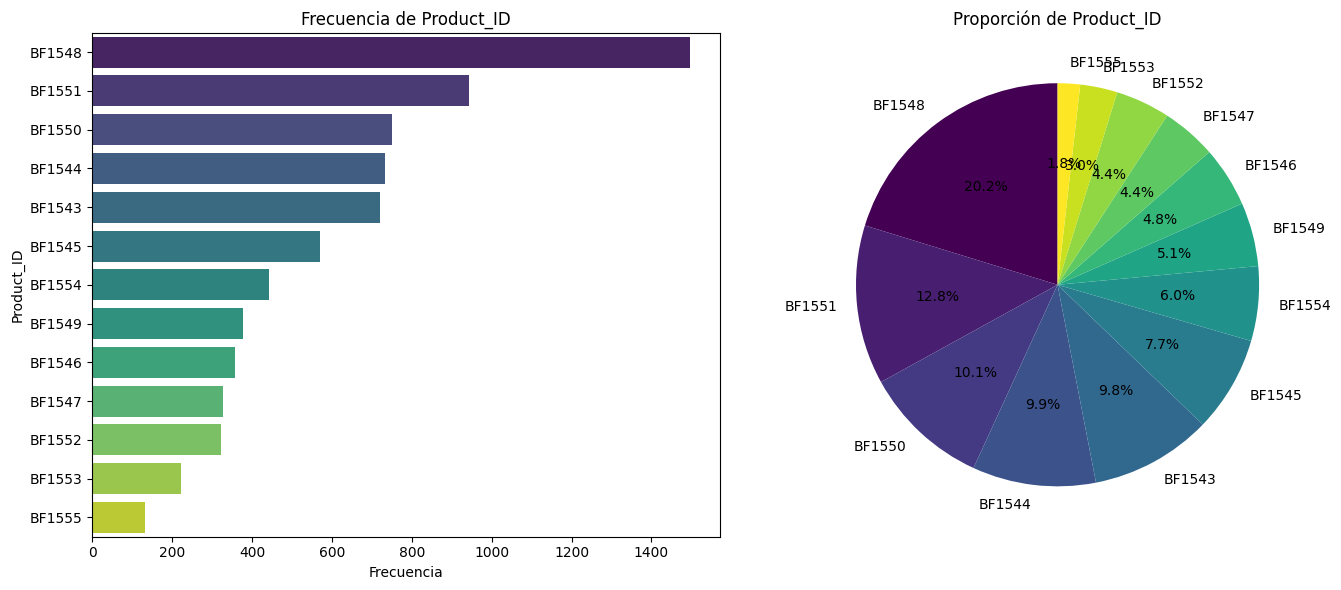

c:\Users\Abdon.RAMIREZ-BRICEN\OneDrive - Akkodis\Documents\EDA\analisis tienda\ClaseAbdon.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=categorical_df[col], order=categorical_df[col].value_counts().index, palette="viridis")


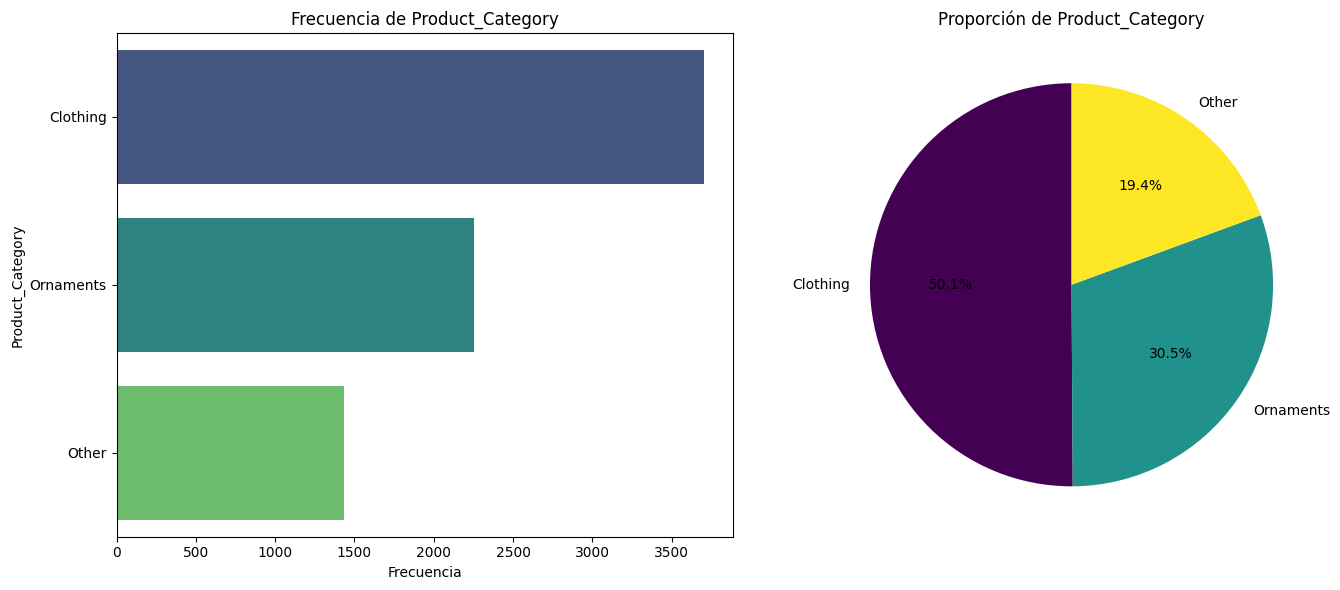

c:\Users\Abdon.RAMIREZ-BRICEN\OneDrive - Akkodis\Documents\EDA\analisis tienda\ClaseAbdon.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=categorical_df[col], order=categorical_df[col].value_counts().index, palette="viridis")


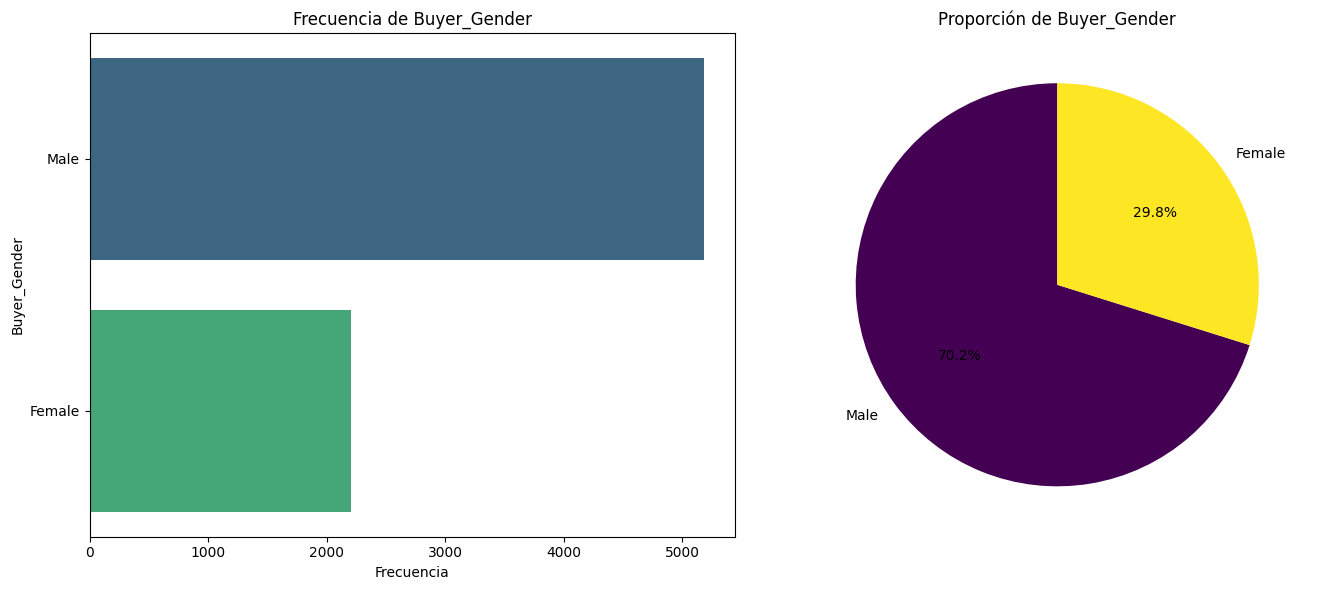

c:\Users\Abdon.RAMIREZ-BRICEN\OneDrive - Akkodis\Documents\EDA\analisis tienda\ClaseAbdon.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=categorical_df[col], order=categorical_df[col].value_counts().index, palette="viridis")


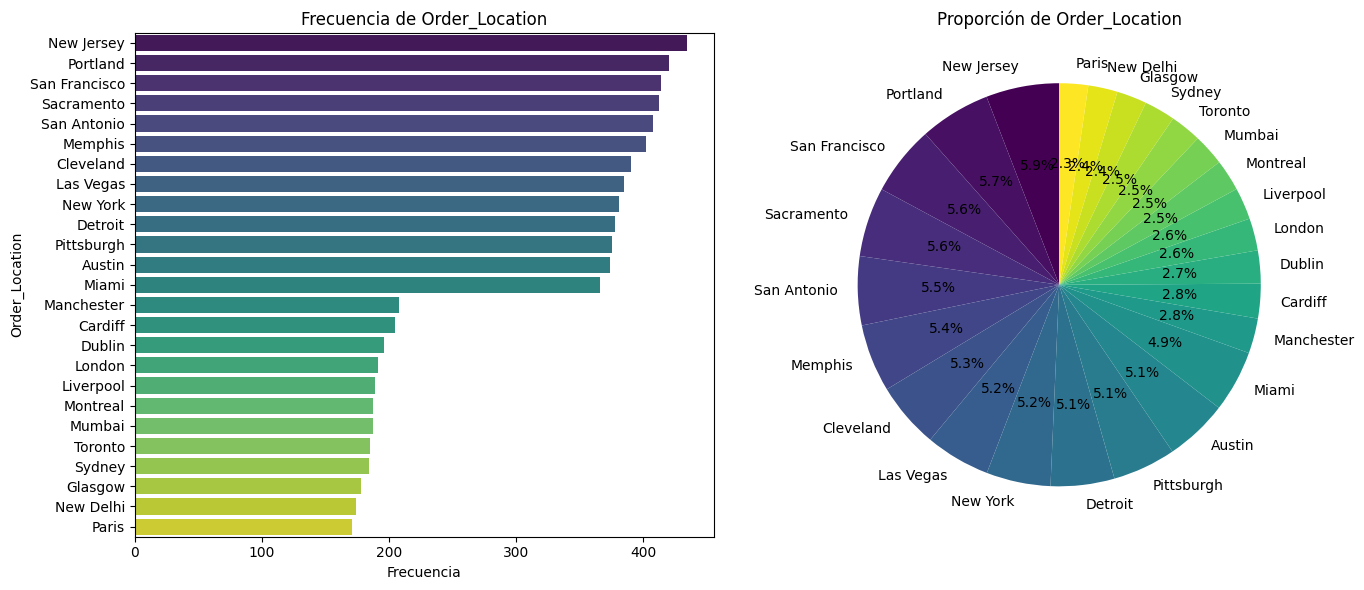

c:\Users\Abdon.RAMIREZ-BRICEN\OneDrive - Akkodis\Documents\EDA\analisis tienda\ClaseAbdon.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=categorical_df[col], order=categorical_df[col].value_counts().index, palette="viridis")


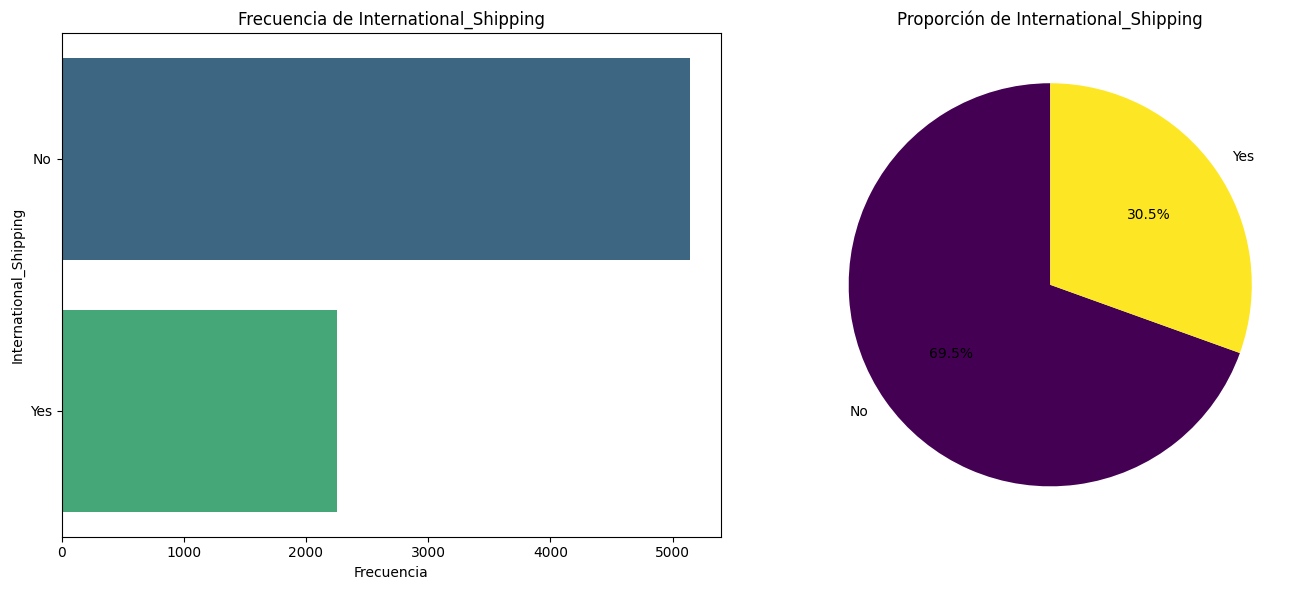

c:\Users\Abdon.RAMIREZ-BRICEN\OneDrive - Akkodis\Documents\EDA\analisis tienda\ClaseAbdon.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=categorical_df[col], order=categorical_df[col].value_counts().index, palette="viridis")


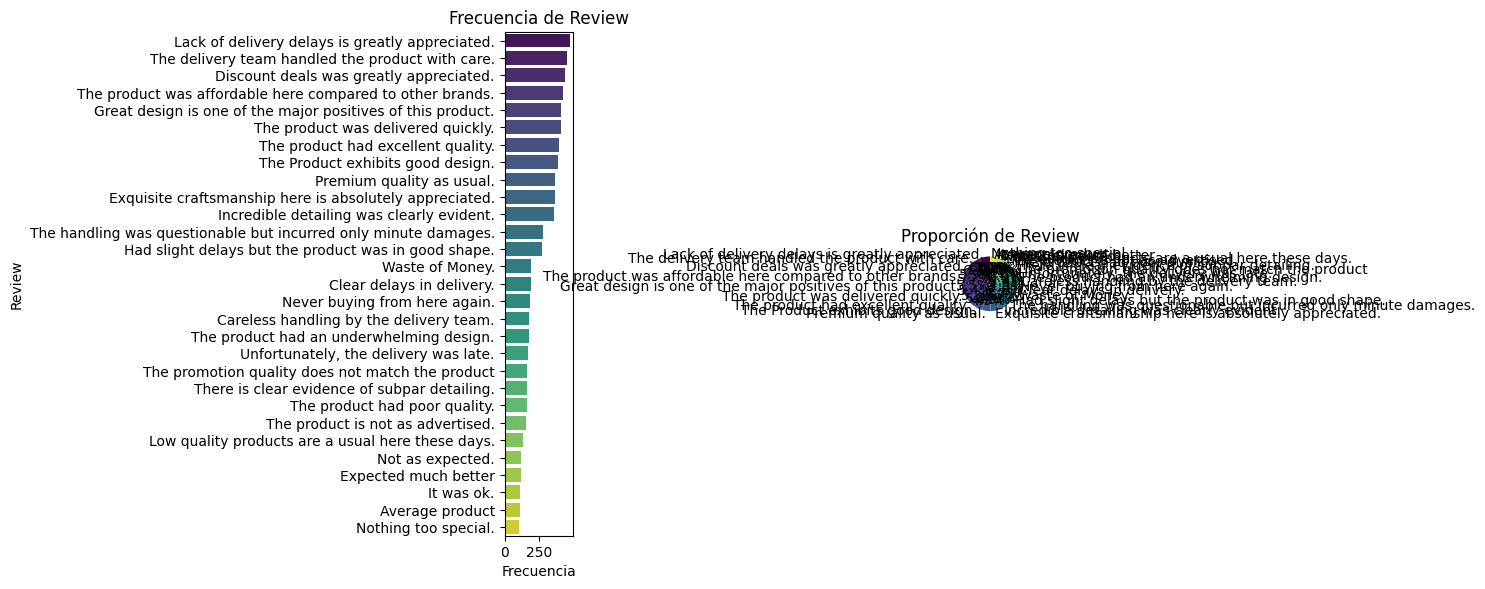

In [13]:
analizar.plot_categorical();

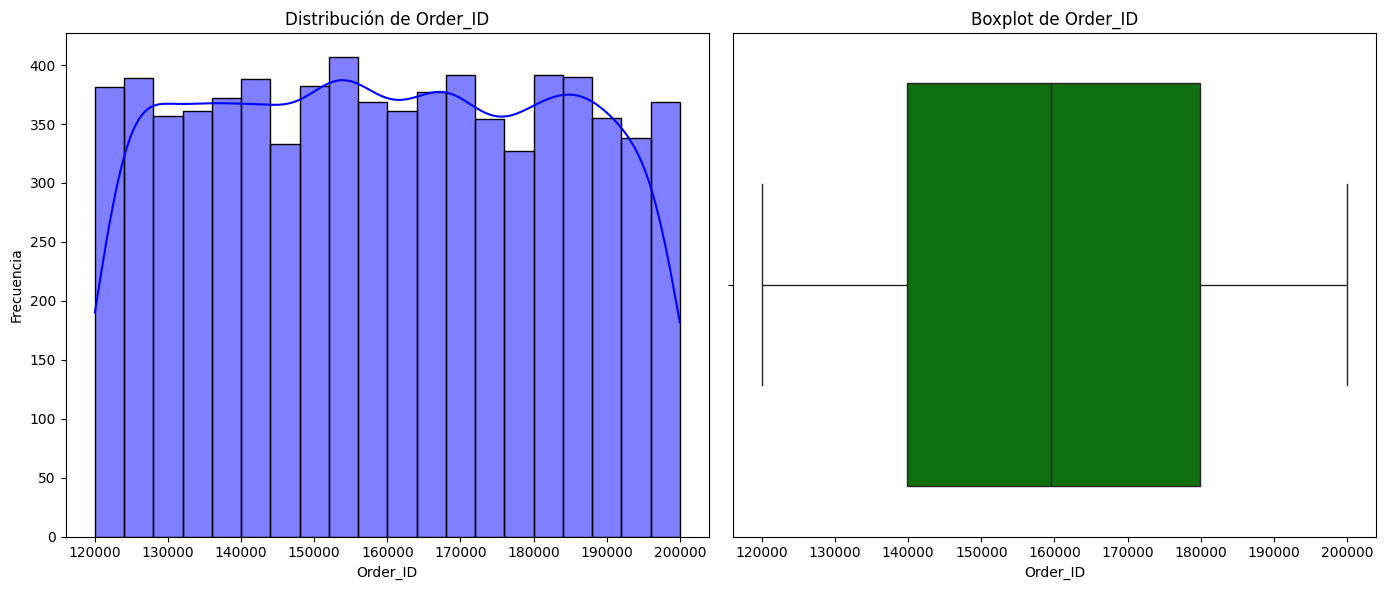

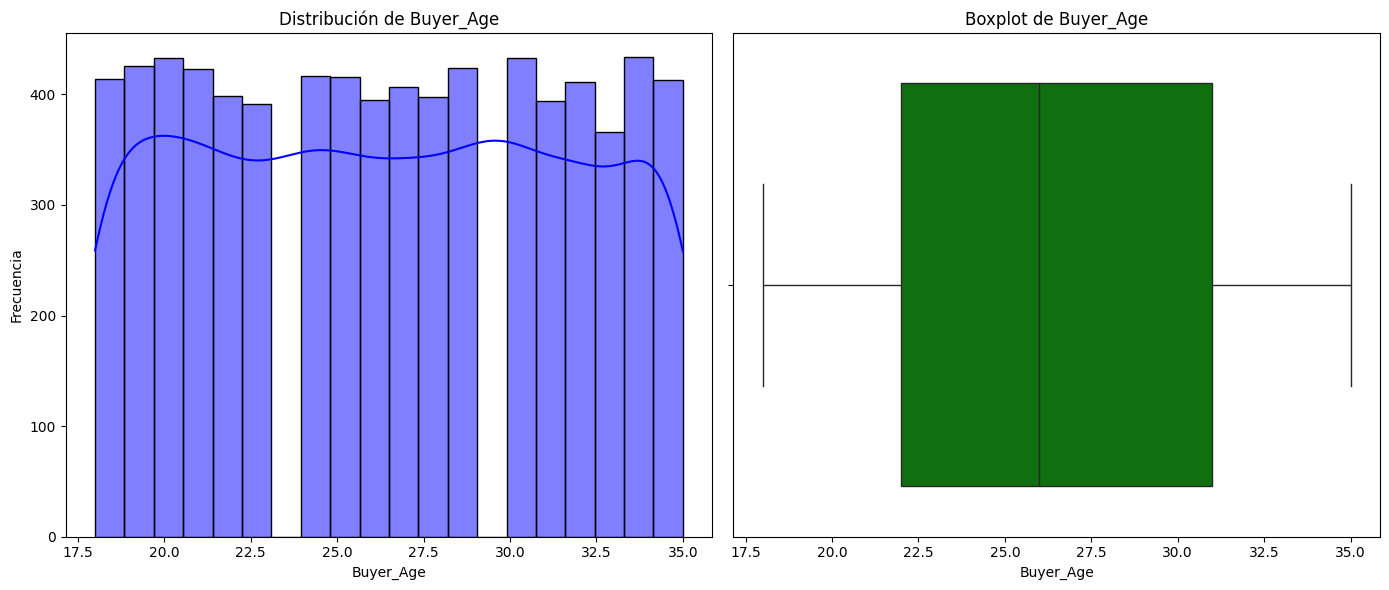

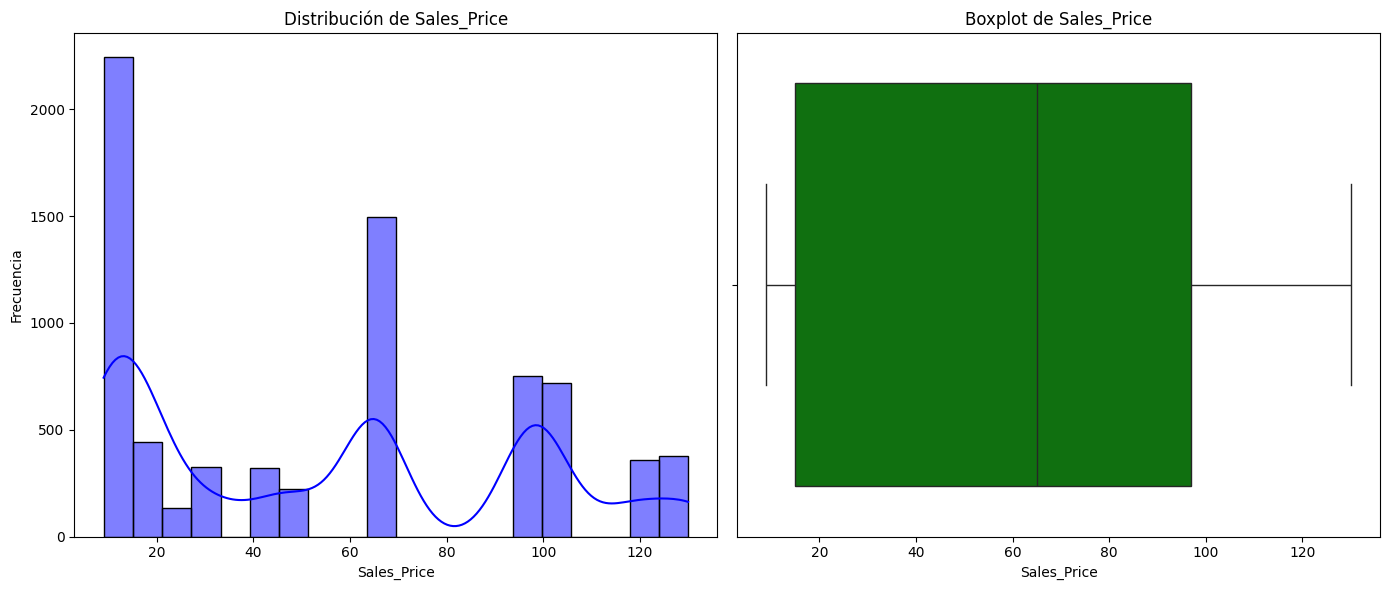

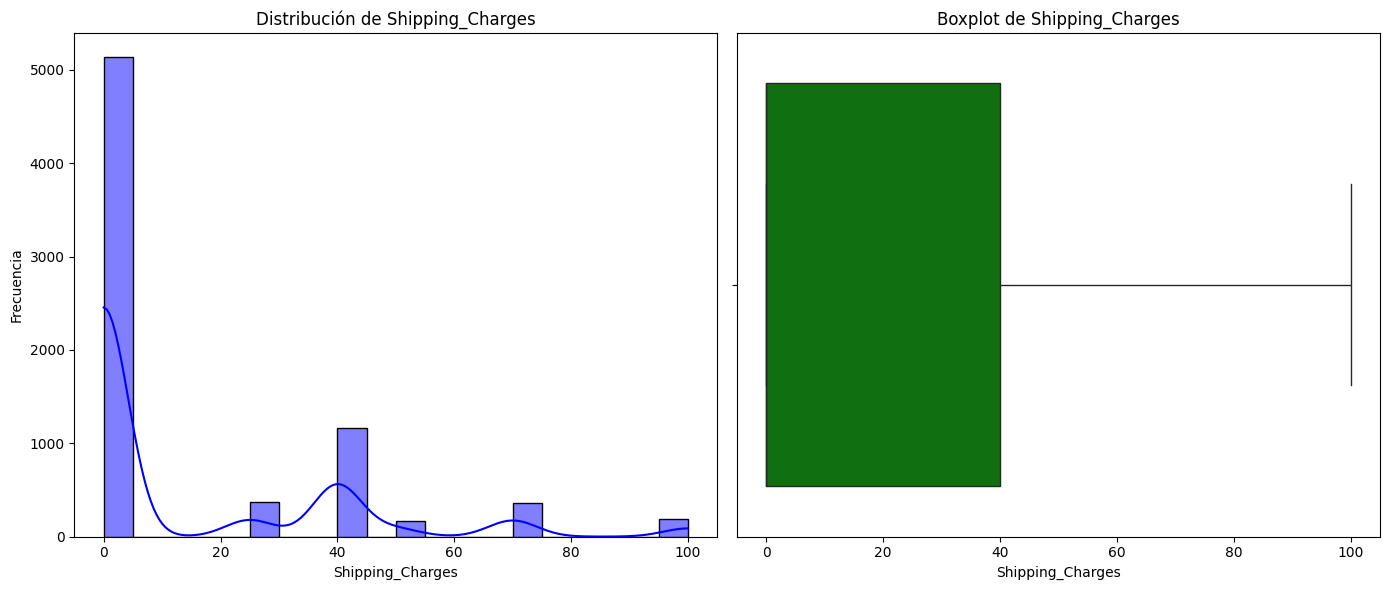

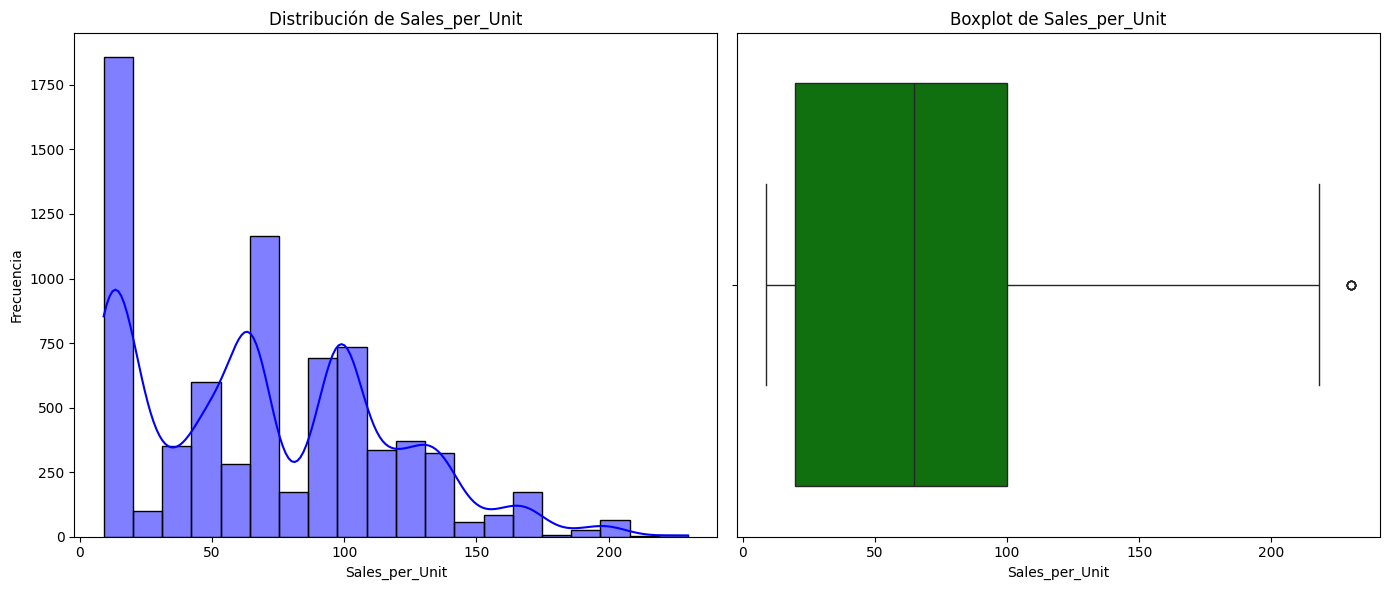

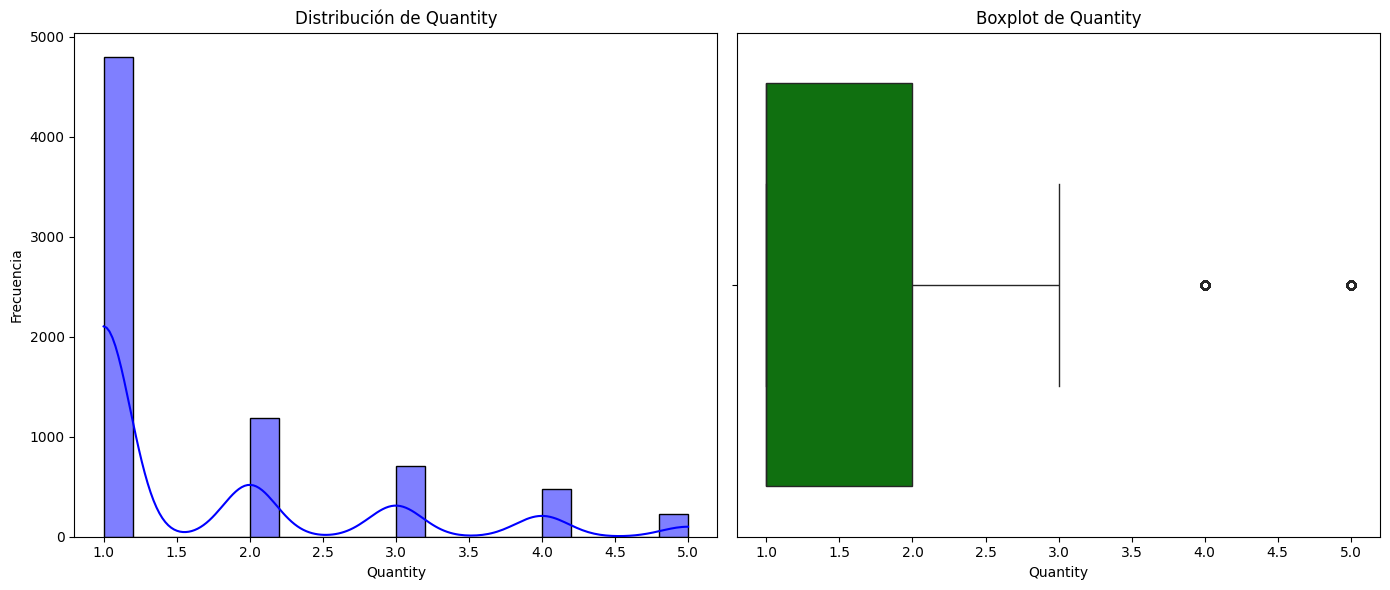

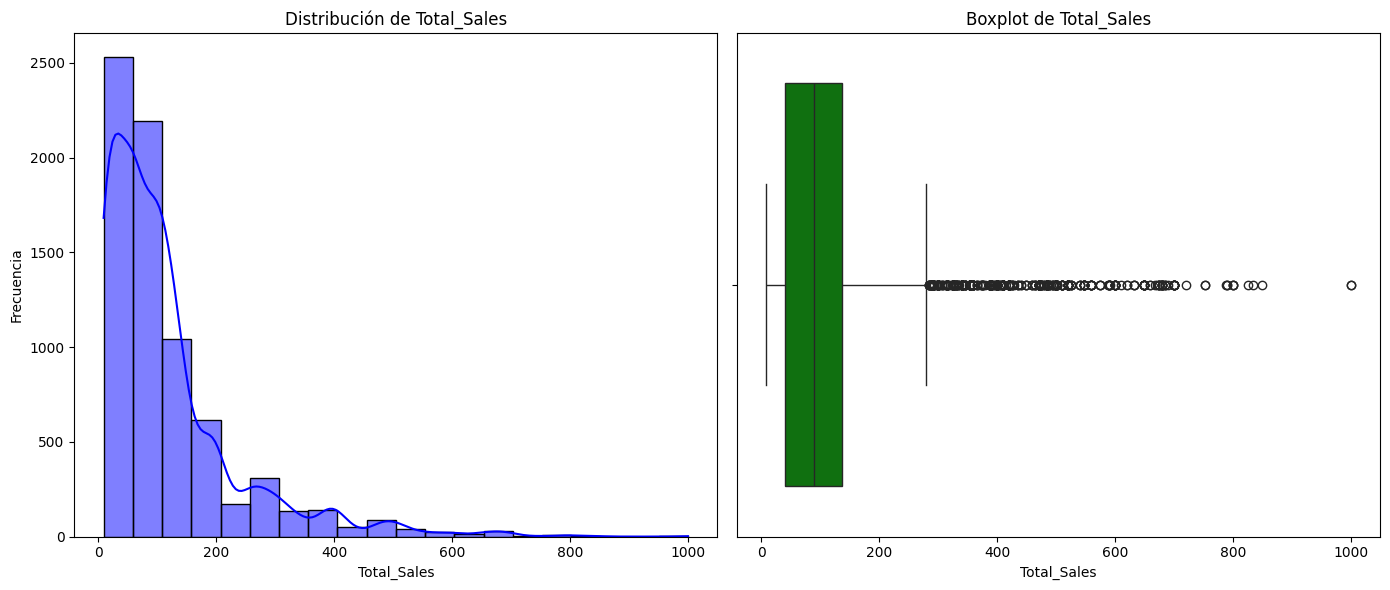

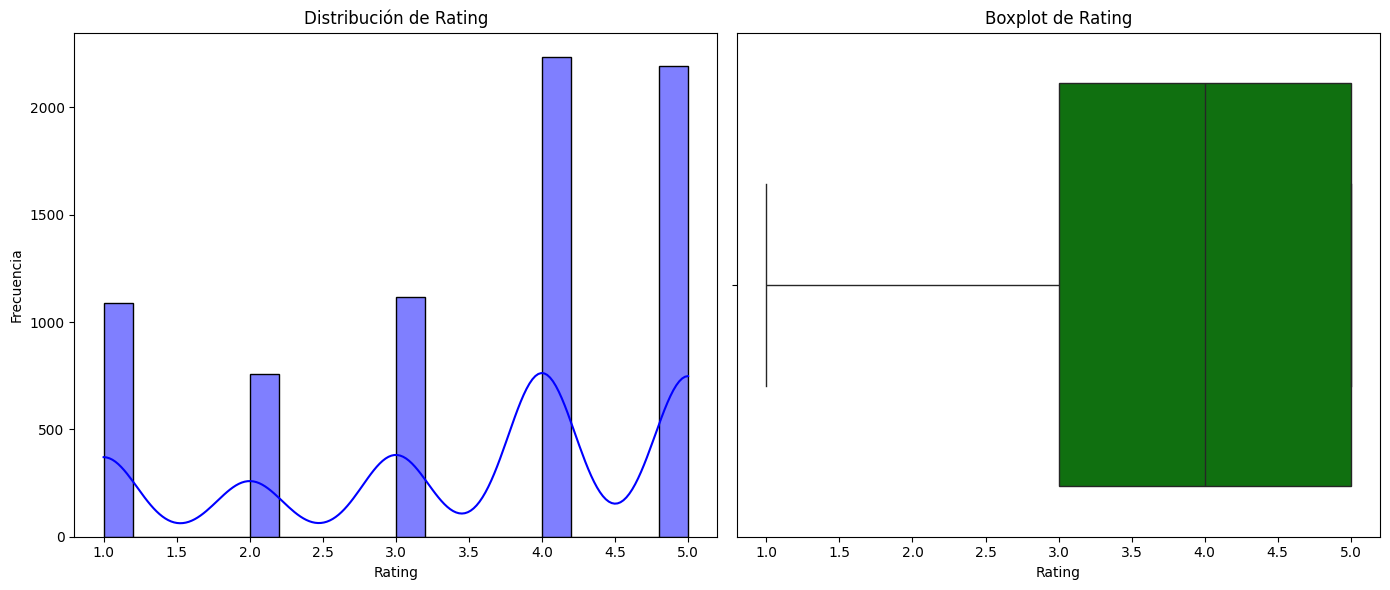

In [15]:
analizar.plot_numeric()